# Utils

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  fig, ax = plt.subplots(figsize=(7, 5))
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

# Food vision (binary classification)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-07 08:47:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.6s    

2023-02-07 08:47:58 (18.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

# for item in data_dir.glob("*"):
#   print(item.name)

class_names

array(['pizza', 'steak'], dtype='<U5')

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


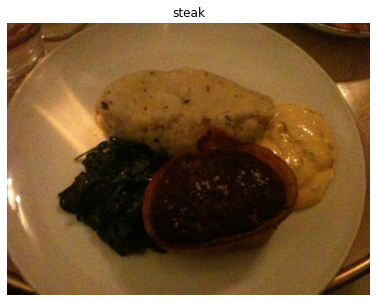

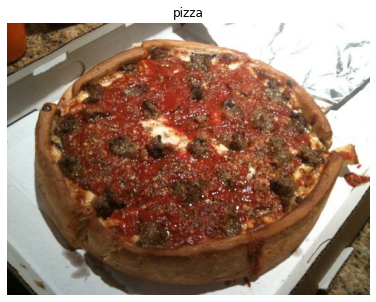

In [ ]:
steak_img = view_random_image("pizza_steak/train/", "steak")
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
import tensorflow as tf

tf.constant(pizza_img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[129,  36,   5],
        [130,  37,   6],
        [131,  38,   4],
        ...,
        [253, 253, 253],
        [252, 252, 252],
        [252, 252, 252]],

       [[129,  36,   5],
        [130,  37,   4],
        [132,  39,   5],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [252, 252, 252]],

       [[129,  36,   5],
        [131,  38,   5],
        [133,  40,   6],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[  4,   6,   1],
        [  3,   5,   0],
        [  3,   5,   0],
        ...,
        [ 66,  62,  33],
        [ 78,  75,  42],
        [ 95,  95,  61]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [ 78,  72,  46],
        [ 85,  81,  52],
        [ 94,  91,  60]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [ 69,  63,  3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory="pizza_steak/train",
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary")

valid_data = valid_datagen.flow_from_directory(
    directory="pizza_steak/test", 
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# tiny VGG: https://towardsdatascience.com/only-numpy-implementing-mini-vgg-vgg-7-and-softmax-layer-with-interactive-code-8994719bcca8
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, "sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# steps_per_epoch and validation_steps splice data into batches: 
#  1500 (imgs number) / 32 (batch size) = len(train_data)
history_1 = model_1.fit(
    train_data,
    epochs=7,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/7
47/47 [==============================] - 22s 206ms/step - loss: 0.6270 - accuracy: 0.6500 - val_loss: 0.4443 - val_accuracy: 0.8100
Epoch 2/7
47/47 [==============================] - 9s 195ms/step - loss: 0.4655 - accuracy: 0.7993 - val_loss: 0.3847 - val_accuracy: 0.8400
Epoch 3/7
47/47 [==============================] - 9s 194ms/step - loss: 0.4273 - accuracy: 0.8107 - val_loss: 0.3703 - val_accuracy: 0.8500
Epoch 4/7
47/47 [==============================] - 9s 189ms/step - loss: 0.4049 - accuracy: 0.8213 - val_loss: 0.3488 - val_accuracy: 0.8420
Epoch 5/7
47/47 [==============================] - 9s 188ms/step - loss: 0.3699 - accuracy: 0.8393 - val_loss: 0.3145 - val_accuracy: 0.8620
Epoch 6/7
47/47 [==============================] - 9s 189ms/step - loss: 0.3218 - accuracy: 0.8680 - val_loss: 0.3364 - val_accuracy: 0.8560
Epoch 7/7
47/47 [==============================] - 11s 236ms/step - loss: 0.2946 - accuracy: 0.8753 - val_loss: 0.4201 - val_accuracy: 0.8040


In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

In [ ]:
probs = model_1.predict(valid_data)

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 136ms/step - loss: 0.4201 - accuracy: 0.8040


[0.42007187008857727, 0.8040000200271606]

In [ ]:
len(train_data)

47

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics="accuracy")

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_history = model_2.fit(
     train_data,
     epochs=5,
     steps_per_epoch=len(train_data),
     validation_data=valid_data,
     validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 12s 236ms/step - loss: 0.7095 - accuracy: 0.5940 - val_loss: 0.4584 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 11s 245ms/step - loss: 0.4700 - accuracy: 0.8013 - val_loss: 0.4639 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 17s 356ms/step - loss: 0.3826 - accuracy: 0.8453 - val_loss: 0.3669 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.2214 - accuracy: 0.9187 - val_loss: 0.3643 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1100 - accuracy: 0.9667 - val_loss: 0.4382 - val_accuracy: 0.8140


In [ ]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.4382 - accuracy: 0.8140


[0.43821701407432556, 0.8140000104904175]

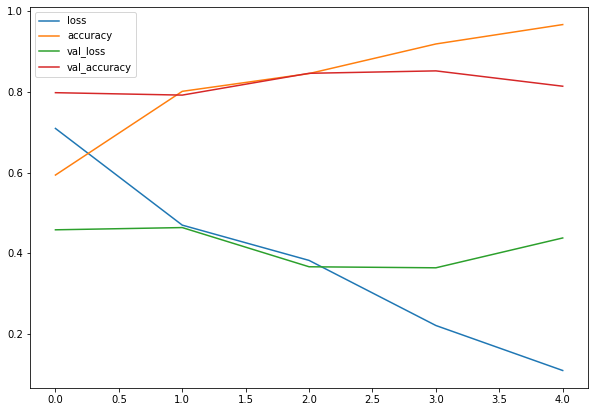

In [ ]:
import pandas as pd
pd.DataFrame(model_2_history.history).plot(figsize=(10, 7))

In [ ]:
def plot_loss(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

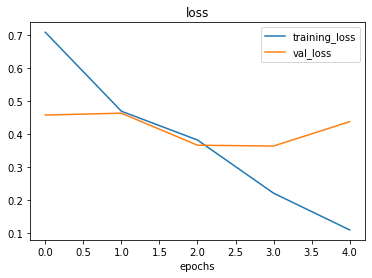

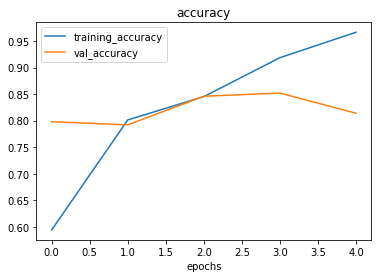

In [ ]:
plot_loss(model_2_history)

In [ ]:
model_3 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics="accuracy")

history_model_3 = model_3.fit(
     train_data,
     epochs=5,
     steps_per_epoch=len(train_data),
     validation_data=valid_data,
     validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.6516 - accuracy: 0.6033 - val_loss: 0.5622 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4872 - accuracy: 0.7620 - val_loss: 0.3945 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4401 - accuracy: 0.7920 - val_loss: 0.3900 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3948 - accuracy: 0.8300 - val_loss: 0.3223 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3738 - accuracy: 0.8360 - val_loss: 0.3165 - val_accuracy: 0.8720


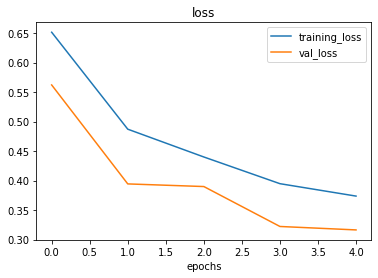

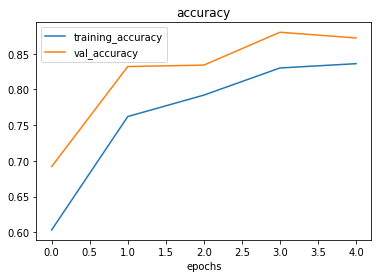

In [ ]:
plot_loss(history_model_3)

In [ ]:
model_3.evaluate(valid_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.3165 - accuracy: 0.8720


[0.3164648115634918, 0.871999979019165]

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
IMG_SIZE = (224, 224)

train_datagen_augmented = ImageDataGenerator(
                        rescale=1/255.,
                        rotation_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True
                      )

test_datagen = ImageDataGenerator(
                        rescale=1/255.
                      )

train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory="pizza_steak/train",
    target_size=IMG_SIZE,
    class_mode="binary",
)

test_data = test_datagen.flow_from_directory(
    directory="pizza_steak/test",
    target_size=IMG_SIZE,
    class_mode="binary",
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

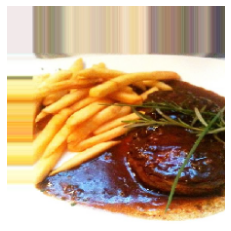

In [ ]:
import random

random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.axis(False)

In [ ]:
model_4 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics="accuracy")

history_model_4 = model_4.fit(
     train_data_augmented,
     epochs=5,
     steps_per_epoch=len(train_data_augmented),
     validation_data=test_data,
     validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6764 - accuracy: 0.5520 - val_loss: 0.5945 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5571 - accuracy: 0.7093 - val_loss: 0.4011 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4821 - accuracy: 0.7740 - val_loss: 0.4088 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4759 - accuracy: 0.7807 - val_loss: 0.3856 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4624 - accuracy: 0.7847 - val_loss: 0.3357 - val_accuracy: 0.8720


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 139ms/step - loss: 0.3357 - accuracy: 0.8720


[0.335658997297287, 0.871999979019165]

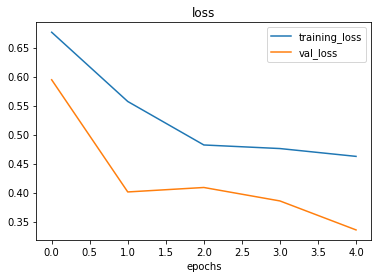

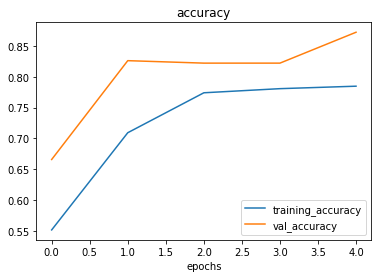

In [ ]:
plot_loss(history_model_4)

In [ ]:
!wget -O pizza-1.png https://github.com/MarkMinerov/Mark-Minerov-AI/blob/main/CNN/pizza-1.png?raw=true

--2023-02-06 15:25:05--  https://github.com/MarkMinerov/Mark-Minerov-AI/blob/main/CNN/pizza-1.png?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MarkMinerov/Mark-Minerov-AI/raw/main/CNN/pizza-1.png [following]
--2023-02-06 15:25:05--  https://github.com/MarkMinerov/Mark-Minerov-AI/raw/main/CNN/pizza-1.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MarkMinerov/Mark-Minerov-AI/main/CNN/pizza-1.png [following]
--2023-02-06 15:25:05--  https://raw.githubusercontent.com/MarkMinerov/Mark-Minerov-AI/main/CNN/pizza-1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

(-0.5, 3023.5, 4031.5, -0.5)

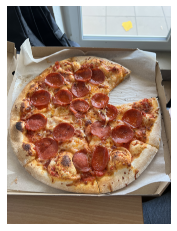

In [ ]:
import matplotlib.image as mpimg
import numpy as np

pizza01 = mpimg.imread("pizza-1.png")

plt.imshow(pizza01)
plt.axis(False)

In [ ]:
tf.reduce_max(pizza01), tf.reduce_min(pizza01)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img / tf.reduce_max(img)
  return img

In [ ]:
img = load_and_prep_image("pizza-1.png")

In [ ]:
# tf predict is also expecting to get a batch size (batch_size, width, height, color_chanels)

pred01 = model_4.predict(tf.expand_dims(img, axis=0))
pred01

1/1 [==============================] - 0s 28ms/step


array([[0.43472013]], dtype=float32)

In [ ]:
class_names[int(tf.round(pred01))]

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 17ms/step
[[0.43472013]]


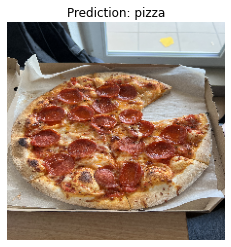

In [ ]:
pred_and_plot(model_4, "pizza-1.png", class_names)

In [ ]:
!wget -O pizza-2.png https://github.com/MarkMinerov/Mark-Minerov-AI/blob/main/CNN/pizza-2.png?raw=true

1/1 [==============================] - 0s 15ms/step
[[0.34109873]]


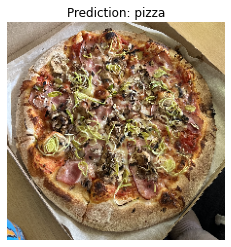

In [ ]:
pred_and_plot(model_4, "pizza-2.png", class_names)

In [ ]:
!wget -O pizza-3.jpeg https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true

1/1 [==============================] - 0s 27ms/step
[[0.3737369]]


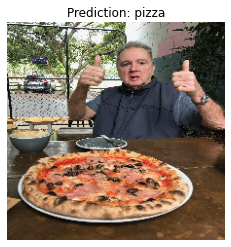

In [ ]:
pred_and_plot(model_4, "pizza-3.jpeg", class_names)

# Multi-Class Image Classification

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-02-07 09:41:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  68.5MB/s    in 13s     

2023-02-07 09:41:15 (38.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import zipfile

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [10]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


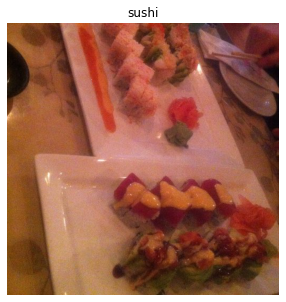

In [27]:
import random

img = view_random_image(train_dir, random.choice(class_names))